In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Generation

In [7]:
observations = 1000
init_value = 10


xs = np.random.uniform(-init_value, init_value, size=(observations,1))
zs = np.random.uniform(-init_value, init_value, size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size=(observations,1))

generated_targets = 3*xs + 5*zs - 5 + noise

np.savez("TF1_Intro", inputs=generated_inputs, targets=generated_targets)


# Solving with Tensorflow

In [8]:
input_size = 2
output_size =1

# Outlining the model

In [14]:
#Each objects we create using tf library will do nothing unless explicity told to. 
#If rather describe the logic of the algorithm.

inputs = tf.placeholder(np.float32,[None,input_size])
targets = tf.placeholder(np.float32,[None,output_size])

weights = tf.Variable(tf.random_uniform([input_size, output_size],minval=-0.1,maxval=0.1))
bias = tf.Variable(tf.random_uniform([output_size],minval=-0.1,maxval=0.1))

outputs = tf.matmul(inputs,weights) + bias


In [19]:
mean_loss = tf.losses.mean_squared_error(labels=targets,predictions=outputs)/2

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss)

# Preparing for Execution

In [20]:
sess = tf.InteractiveSession()

# Initializate the Variables

In [21]:
initializer = tf.global_variables_initializer()

sess.run(initializer)

# Loading data

In [24]:
training_data = np.load("TF1_Intro.npz")

# Learning 

In [39]:
for e in range(100):
    _, curr_loss = sess.run([optimizer, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

570.4198
230.25903
96.42824
43.352413
21.956812
13.043051
9.087623
7.133525
6.012606
5.2591643
4.6844425
4.2095537
3.7997077
3.438127
3.115638
2.8264458
2.5663803
2.3321576
2.1210322
1.9306303
1.7588638
1.6038833
1.4640293
1.3378136
1.2239028
1.1210945
1.0283018
0.9445487
0.86895496
0.80072325
0.7391382
0.6835509
0.63337636
0.5880891
0.54721314
0.5103178
0.47701603
0.44695663
0.41982543
0.3953369
0.37323236
0.3532812
0.33527294
0.31901854
0.3043474
0.29110485
0.279152
0.26836324
0.25862518
0.24983518
0.24190174
0.23474096
0.2282772
0.22244318
0.21717706
0.2124243
0.20813416
0.20426175
0.20076658
0.19761176
0.19476412
0.19219403
0.18987389
0.18778008
0.18588996
0.18418398
0.18264419
0.1812543
0.17999971
0.17886752
0.17784543
0.17692289
0.17609023
0.17533873
0.1746604
0.17404807
0.17349537
0.17299649
0.17254622
0.17213976
0.17177297
0.17144185
0.17114307
0.17087322
0.17062978
0.17041
0.17021161
0.17003256
0.16987091
0.16972505
0.16959342
0.16947453
0.16936731
0.16927046
0.16918309
0.1691

# Plot the data

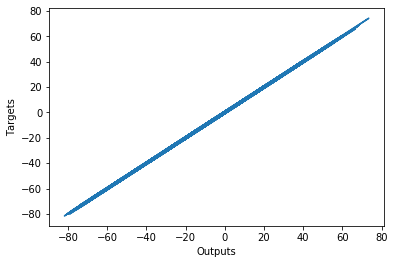

In [45]:
out = sess.run([outputs],
            feed_dict={inputs: training_data['inputs']})

plt.plot(np.squeeze(out),np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()
